In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
Nmax=2048
x = [float(i) for i in range(0,Nmax)]
#y = [0.04375*10**(-5.0*float(i)/Nmax) for i in range(0,Nmax)]
y = [0.25*10**(-5.0*float(i)/Nmax) for i in range(0,Nmax)]
r = np.zeros(Nmax)
x1 = np.zeros(Nmax)
Nden = np.zeros(Nmax)
NTinK = np.zeros(Nmax)
Totg = np.zeros(Nmax)
gden = np.zeros(Nmax)
gprs = np.zeros(Nmax)
Totp = np.zeros(Nmax)
geltn= np.zeros(Nmax)
K = np.zeros(Nmax)
TkeV = np.zeros(Nmax)
vc = np.zeros(Nmax)
rs = 0.00789; den_unit = 3.7576e-29; len_unit = 1.2344e25; mue=1.17
kpc=3.086e21; msun=2.0e33; G = 6.67428e-8; M200=2.0e12
SMBH = 6.0e9; kB=1.38e-16; mu=0.617; mp=1.67e-24; c200=9.0
gma=5.0/3; invgma=1.0/gma; clight = 3.0e10; baryon_frac=0.0004; rho0= 6000.0
rho_0 = 2*1.67e-22; a_0=1.5;
gconst = 4.0*np.pi*rho0*den_unit*((rs*len_unit)**3)*(math.log(1+c200)-c200/(1.0+c200))/msun
print("%20.7e\n"%(gconst))
#print"%20.7e\n"%(math.log(1.0+4.7) - 4.7/5.7)
#gconst = 1.0e12 
const = mu*mp*(mue*mp)**(gma-1)/(kB*1.16e7)
for i in range(0,Nmax):
    r[i] = y[i]*len_unit/3.086e21;
    x1[i] = y[i]/rs
    #Nden[i] = rho0/(x1[i]*(1.0+x1[i])**2) #NFW density
    #if (r[i] > 300):
    #    NTinK[i] = 1.1604e7*7.0594*1.3*(1.0+1.5*x1[i])**(-1.6);  
    #else:
    #    NTinK[i] = 8.12e7*(1.0+(r[i]/71.0)**3.0)/(2.3 + (r[i]/71.0)**3.0);  
    K[i] = 5.0 + 85.0*(y[i]*len_unit/(100.0*kpc))**1.1
    Totp[i] = -(G*gconst*msun*math.log(1+x1[i])/(math.log(1.0+c200) - c200/(1.0+c200))/(y[i]*len_unit + 1.0e-3*kpc) \
              + 2.0*3.14159*G*rho_0*(a_0*kpc)**3/(y[i]*len_unit + a_0*kpc ) \
              + G*SMBH*msun/(y[i]*len_unit-2.0*G*SMBH*msun/clight**2))
    Totg[i] = G*gconst*msun*((math.log(1.0+x1[i])-x1[i]/(1.0+x1[i]))/(math.log(1.0+c200)-c200/(1.0+c200)) \
              )/(y[i]*len_unit)**2.0\
              + 2.0*3.14159*G*rho_0*(a_0*kpc)**3/(y[i]*len_unit + a_0*kpc)**2 \
              + G*msun*SMBH/(y[i]*len_unit - 2.0*G*SMBH*msun/clight**2)**2;
        
    vc[i] = math.sqrt(Totg[i]*y[i]*len_unit);
    if (i==0):
        gden[i] = 1.0e-29;
        #gprs[i] = NTinK[i]*(Nden[i]*den_unit*baryon_frac)*kB/(mu*mp)
        #gprs[i] = NTinK[i]*gden[i]*kB/(mu*mp)
        gprs[i] = K[i]*gden[i]**(gma)/const
    if(i > 0):
        err = 1.0e20
        pg = gprs[i-1]
        while(err >=1.0e-10):
            #fn =  pg - gprs[i-1] +(0.5*mu*mp/kB)*(Totp[i]-Totp[i-1])*((pg/NTinK[i]) + gprs[i-1]/NTinK[i-1])
            #print"%20.7e\n"%(fn)
            #fnp = 1.0+ (0.5*mu*mp/kB)*(Totp[i]-Totp[i-1])/NTinK[i]
            fn = pg - gprs[i-1] + 0.5*(Totp[i]-Totp[i-1])*const**invgma \
                  *((pg/K[i])**invgma + (gprs[i-1]/K[i-1])**invgma)
            fnp = 1 + 0.5*(Totp[i]-Totp[i-1])*invgma*pg**(invgma-1.0)*(const/K[i])**invgma
            pg = pg - fn/fnp
            err = math.fabs(fn/fnp)/pg
        #print"%20.7e\n"%(fn)
        gprs[i]= pg
for i in range(0,Nmax):
        #gden[i] = gprs[i]*mu*mp/(NTinK[i]*kB)
        gden[i] = (gprs[i]*const/K[i])**invgma
        geltn[i] = gden[i]/(mue*mp)
        TkeV[i] = gprs[i]*mu*mp/(gden[i]*kB)/1.16e7
        #plt.loglog(r,NTinK,'r--')

       1.8355644e+12



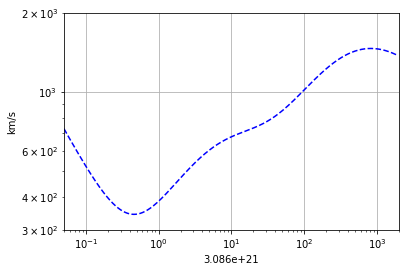

In [154]:
plt.loglog(r,vc/1.e5,'b--')
plt.ylim(300,2000)
plt.xlim(0.05,2000)
plt.xlabel(kpc)
plt.ylabel('km/s')
plt.grid()
plt.show()
#plt.save('Desktop/initialisation/circular_vel_Tot.png')


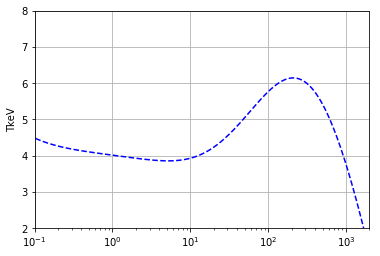

In [155]:
plt.semilogx(r,TkeV,'b--')#, r, NTinK/1.16e7,'r-')
plt.ylim(2,8)
plt.xlim(0.1,2000)
plt.ylabel('TkeV')
plt.grid()

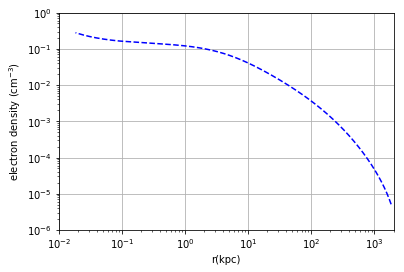

In [156]:
plt.loglog(r,geltn,'b--')
plt.xlabel('r(kpc)')
plt.ylabel('electron density (cm$^{-3}$)')
plt.xlim(0.01,2000)
plt.ylim(1.0e-6,1.0)
plt.grid()
plt.show()

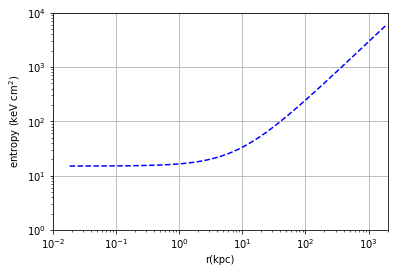

In [142]:
plt.loglog(r,K,'b--')
plt.xlabel('r(kpc)')
plt.ylabel('entropy (keV cm$^{2}$)')
plt.xlim(0.01,2000)
plt.ylim(1.0,10000.0)
plt.grid()
plt.show()

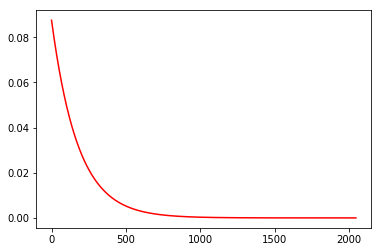

In [91]:
import numpy as np
import matplotlib.pyplot as plt

nmax=2048
x = [float(i) for i in range(0,Nmax)]
#y = [0.04375*10**(-5.0*float(i)/Nmax) for i in range(0,Nmax)]
y = [0.08750*10**(-5.0*float(i)/Nmax) for i in range(0,Nmax)]

plt.plot(x,y,'r-')